In this file some discussed dummy models for disorder prediction are discussed. <br>
<br>
(1) The logistic regression model that predicts disorder from the number of elements <br>
(2) The RF model that predicts disorder from the fractional coefficients <br>
(3) The model that predicts disorder from the fractional coefficients using the deterministic algorithm:
if f=(f1,...f6) is a compositions and n=1,...N are numbers up to N, then if for all n nf is composed of noninteger numbers (tol = 0.01) then the compound is disordered, otherwise it is ordered (suggested by A. Troisi)

In [11]:
import numpy as np
import pandas as pd
import json
import re
import os
import ast
import matplotlib.pyplot as plt
from utils.composition import composition_from_formula,merged_comp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,matthews_corrcoef
from sklearn.linear_model import LogisticRegression

In [12]:
file='data/ICSD_disorder_1_02_2024.csv'

In [13]:
dis=pd.read_csv(file)

In [14]:
dis.columns

Index(['formula', 'target'], dtype='object')

In [15]:
compositions=merged_comp(dis)

In [17]:
dis['comp']=compositions
list_of_comp=set(compositions)
target=[]
formula=[]
for comp in list_of_comp:
    dx=dis.loc[dis['comp']==comp]
    if(len(set(dx['target'].values))==1):
        target.append(dx['target'].values[0])
        formula.append(dx['formula'].values[0])

In [18]:
dis=pd.DataFrame()
dis['formula']=formula
dis['disorder']=target

In [19]:
len(dis)

89410

In [20]:
num_el=[]
coefficients=[]
exc_index=[]
for i in range(len(dis)):
    try:
        norm_comp=composition_from_formula(dis.iloc[i]['formula'])
        norm=np.sum(list(norm_comp.values()))
        coefficients.append(np.around(np.array(list(norm_comp.values()),dtype=float)/norm,decimals=4))
        num_el.append(len(norm_comp.keys()))
    except:
        exc_index.append(i)
        num_el.append({})
        coefficients.append({})

In [21]:
dis['num_el']=num_el
dis['coef']=coefficients

In [22]:
max(num_el)

20

In [23]:
### Fraction of disordered compounds

In [24]:
len(dis.loc[dis['disorder']==1])/len(dis)

0.6104238899451963

In [25]:
dis

,formula,disorder,num_el,coef
0,Cr12 P7,1,2,"[0.6316, 0.3684]"
1,Ba0.12 Bi0.82 Fe0.88 O3 Ti0.12,1,5,"[0.1781, 0.6073, 0.0243, 0.0243, 0.166]"
2,Hf2 P1 Sb1,0,3,"[0.5, 0.25, 0.25]"
3,Pd4 Pr2 Sn7,0,3,"[0.5385, 0.3077, 0.1538]"
4,Cr2 Fe0.13 Mg0.87 O4,1,4,"[0.2857, 0.0186, 0.5714, 0.1243]"
...,...,...,...,...
89405,In4.76 Nd3.9 S13,1,3,"[0.1801, 0.6002, 0.2198]"
89406,Al4.648 O9.672 Si1.352,1,3,"[0.0863, 0.6172, 0.2966]"
89407,Al3.6 Bi0.47 Fe9.4 La6,1,4,"[0.4828, 0.3082, 0.0241, 0.1849]"
89408,Br10 Co1 Gd6,0,3,"[0.3529, 0.5882, 0.0588]"


## Model 1

In [33]:
X=np.array([dis['num_el']]).T
y=dis['disorder']

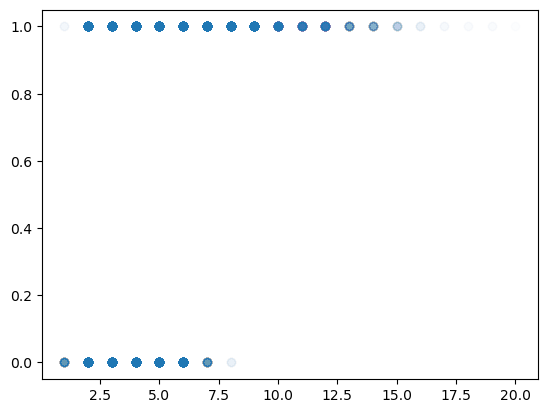

In [34]:
plt.scatter(X,y,alpha=0.01)
plt.show()

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=42)
Xtrain, Xval, yval, yval = train_test_split(X, y, test_size=0.1, random_state=42)

In [36]:
LG=LogisticRegression()

In [37]:
LG.fit(Xtrain,ytrain)

LogisticRegression()

In [38]:
LG.score(Xval,yval)

0.6389665585504977

In [39]:
pred=LG.predict(Xtest)

In [40]:
print('acc: ', accuracy_score(pred,ytest))
print('MOC: ',matthews_corrcoef(pred,ytest))
print('AUC: ', roc_auc_score(pred,ytest))
print('F1-score: ', f1_score(pred,ytest))

acc:  0.6389665585504977
MOC:  0.16771838739863007
AUC:  0.6313616886988529
F1-score:  0.7599643069601428


## Model 2

In [41]:
dis

,formula,disorder,num_el,coef
0,Cr12 P7,1,2,"[0.6316, 0.3684]"
1,Ba0.12 Bi0.82 Fe0.88 O3 Ti0.12,1,5,"[0.1781, 0.6073, 0.0243, 0.0243, 0.166]"
2,Hf2 P1 Sb1,0,3,"[0.5, 0.25, 0.25]"
3,Pd4 Pr2 Sn7,0,3,"[0.5385, 0.3077, 0.1538]"
4,Cr2 Fe0.13 Mg0.87 O4,1,4,"[0.2857, 0.0186, 0.5714, 0.1243]"
...,...,...,...,...
89405,In4.76 Nd3.9 S13,1,3,"[0.1801, 0.6002, 0.2198]"
89406,Al4.648 O9.672 Si1.352,1,3,"[0.0863, 0.6172, 0.2966]"
89407,Al3.6 Bi0.47 Fe9.4 La6,1,4,"[0.4828, 0.3082, 0.0241, 0.1849]"
89408,Br10 Co1 Gd6,0,3,"[0.3529, 0.5882, 0.0588]"


In [42]:
X=np.zeros(((len(dis)),max(dis['num_el'].values)))

In [43]:
for i,x_line in enumerate(X):
    for j,x in enumerate(dis.iloc[i]['coef']):
        X[i][j]=x
    

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=42)
Xtrain, Xval, yval, yval = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
RF=RandomForestClassifier(n_estimators=80)

In [46]:
RF.fit(Xtrain,ytrain)
RF.score(Xval,yval)

0.8221675427804496

In [47]:
pred=RF.predict(Xtest)

In [48]:
print('acc: ', accuracy_score(pred,ytest))
print('MOC: ',matthews_corrcoef(pred,ytest))
print('AUC: ', roc_auc_score(pred,ytest))
print('F1-score: ', f1_score(pred,ytest))

acc:  0.8221675427804496
MOC:  0.6354552269612597
AUC:  0.8125762007400157
F1-score:  0.8495173197047132


## Model 3

In [1]:
X=dis['coef'].values
y=dis['disorder'].values

NameError: name 'dis' is not defined

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
N=42
tol=0.03

In [29]:
def classify(X,N=42,tol=0.03):
    pred=[]
    
    for vec in X:
        switch=0
        for n in range(1,N+1):
            switch_line=[]
            for x in vec:
                x_scaled=x*n
                if(abs(x_scaled-round(x_scaled,0))<tol):
                    switch_line.append(True)
            if(set(switch_line)=={True}):
                switch=1
        if(switch==0):
            cl=1
        else:
            cl=0
        pred.append(cl)
        
    return pred

In [30]:
pred=classify(Xtrain,N=45,tol=0.001)
print('MOC: ',matthews_corrcoef(pred,ytrain))

MOC:  0.30364054930973816


In [31]:
pred=classify(Xtest,N=45,tol=0.001)

In [32]:
print('acc: ', accuracy_score(pred,ytest))
print('MOC: ',matthews_corrcoef(pred,ytest))
print('AUC: ', roc_auc_score(pred,ytest))
print('F1-score: ', f1_score(pred,ytest))

acc:  0.5321552399060507
MOC:  0.30725821328764336
AUC:  0.7052332962215598
F1-score:  0.3928001161271593
